In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class_name']
iris_df = pd.read_csv('iris/iris_binary.data', names=features)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df['class_name'] = iris_df['class_name'].astype('category')
iris_df['label'] = iris_df['class_name'].cat.codes
iris_df['bias'] = 1.0
X = iris_df.loc[:, ['bias', 'sepal_length', 'sepal_width']]
Y = iris_df.loc[:, 'label']
X.head()

,bias,sepal_length,sepal_width
0,1.0,5.1,3.5
1,1.0,4.9,3.0
2,1.0,4.7,3.2
3,1.0,4.6,3.1
4,1.0,5.0,3.6


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

### What machine learning looks like under the hood: implementing gradient descent. 

In [5]:
def sigmoid(Z):
    return 1.0 / (1.0 + np.exp(-Z))

In [6]:
def sigmoid_derivative(Z):
    return sigmoid(Z) * (1.0 - sigmoid(Z))

In [7]:
def log_loss(X, Y, weights):
    rows, cols = X.shape
    lambd = 0
    X = np.asarray(X)
    Y = np.asarray(Y)
    # calculate pre-sigmoid prediction
    Z = np.dot(X, weights)
    y_hat = sigmoid(Z)
    #cost = (1.0 / rows) * (-np.dot(Y.T, np.log(y_hat)) * np.dot((1 - Y.T), np.log(1 - y_hat)))
    cost = (-1.0 / rows) * (np.dot(Y.T, np.log(y_hat)) + np.dot((1 - Y.T), np.log(1 - y_hat)))
    weights_copy = weights.copy()
    weights_copy[0] = 0 # the bias is not regularized
    # add regularization
    cost += (lambd / (2.0 * rows)) * np.dot(weights_copy.T, weights)
    return cost

In [8]:
def gradient_vector(X, Y, weights):
    rows, cols = X.shape
    lambd = 0
    X = np.asarray(X)
    Y = np.asarray(Y)
    # calculate pre-sigmoid prediction
    Z = np.dot(X, weights)
    y_hat = sigmoid(Z)
    weights_copy = weights.copy()
    weights_copy[0] = 0 # the bias is not regularized
    gradient = (1.0 / rows) * (np.dot((y_hat - Y).T, X).T) + (lambd / rows) * weights_copy
    return gradient

In [9]:
list_weights = []

def fit(X, Y, epochs=100, learning_rate=0.1):
    rows, cols = X.shape
    weights = np.asarray([0.01, 0.01, 0.01])
    X = np.asarray(X)
    Y = np.asarray(Y)
    for i in range(epochs):
        loss = log_loss(X, Y, weights)
        print('Epoch: %d   loss: %0.3f' % (i+1, loss))
        gradient = gradient_vector(X, Y, weights)
        weights_copy = weights.copy()
        weights = weights_copy - learning_rate * gradient
        if epochs % 25 == 0:
            list_weights.append(weights)
    return weights

In [10]:
weights = fit(X_train, Y_train)
print(weights)

Epoch: 1   loss: 0.687
Epoch: 2   loss: 0.673
Epoch: 3   loss: 0.667
Epoch: 4   loss: 0.660
Epoch: 5   loss: 0.654
Epoch: 6   loss: 0.648
Epoch: 7   loss: 0.641
Epoch: 8   loss: 0.635
Epoch: 9   loss: 0.629
Epoch: 10   loss: 0.624
Epoch: 11   loss: 0.618
Epoch: 12   loss: 0.612
Epoch: 13   loss: 0.607
Epoch: 14   loss: 0.601
Epoch: 15   loss: 0.596
Epoch: 16   loss: 0.590
Epoch: 17   loss: 0.585
Epoch: 18   loss: 0.580
Epoch: 19   loss: 0.575
Epoch: 20   loss: 0.570
Epoch: 21   loss: 0.565
Epoch: 22   loss: 0.560
Epoch: 23   loss: 0.555
Epoch: 24   loss: 0.551
Epoch: 25   loss: 0.546
Epoch: 26   loss: 0.542
Epoch: 27   loss: 0.537
Epoch: 28   loss: 0.533
Epoch: 29   loss: 0.528
Epoch: 30   loss: 0.524
Epoch: 31   loss: 0.520
Epoch: 32   loss: 0.516
Epoch: 33   loss: 0.512
Epoch: 34   loss: 0.508
Epoch: 35   loss: 0.504
Epoch: 36   loss: 0.500
Epoch: 37   loss: 0.496
Epoch: 38   loss: 0.493
Epoch: 39   loss: 0.489
Epoch: 40   loss: 0.485
Epoch: 41   loss: 0.482
Epoch: 42   loss: 0.478
E

In [11]:
def predict(X, weights):
    rows, cols = X.shape
    Z = np.dot(X, weights)
    y_hat = sigmoid(Z)
    pred = (y_hat > 0.5).astype('int')
    return pred

In [12]:
y_hat = predict(X_test, weights)

In [13]:
print(classification_report(Y_test, y_hat))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        28
          1       1.00      1.00      1.00        22

avg / total       1.00      1.00      1.00        50



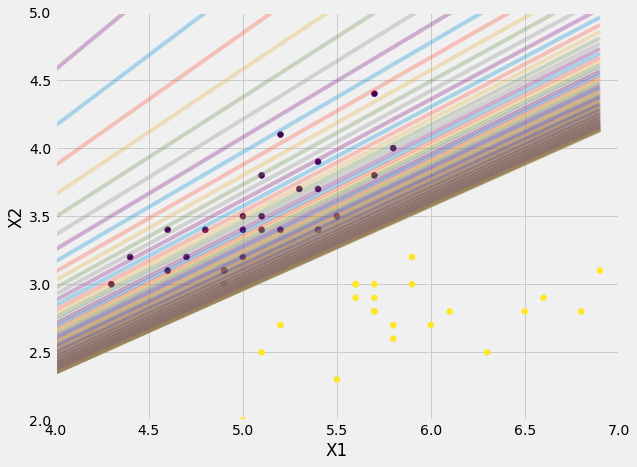

In [15]:
dataArr = np.asmatrix(X)
n = dataArr.shape[0]
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)
plt.scatter(X_test.iloc[:, 1], X_test.iloc[:, 2], c=Y_test)

w = list_weights

for i in range(len(w)):
    x = np.arange(4.0, 7.0, 0.1)
    y = (-w[i][0]-w[i][1]*x)/w[i][2]
    ax.plot(x, y, alpha=0.3)
plt.axis([4.0, 7.0, 2.0, 5.0])
plt.xlabel('X1'); plt.ylabel('X2');
plt.show()